In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [289]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## EDA

In [290]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### Chek Nan values

In [292]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [293]:
data[data.isnull().any(axis=1)]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,NaN
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,NaN


Fill NaN values with the mean of the column

In [294]:
data['salary'].fillna(data['salary'].mean(), inplace=True)


In [295]:
data.isnull().sum() # check if there are any null values

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

### Convert categorical variables to numeric variables

In [296]:
ohe_data = pd.get_dummies(data, columns = ['ssc_b', 'gender','hsc_b','hsc_s','degree_t','workex','specialisation','status'])
ohe_data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Central,ssc_b_Others,gender_F,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.000000,0,1,0,...,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,0,...,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,0,...,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,0,...,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.000000,0,1,0,...,0,1,0,0,1,0,1,0,0,1
211,212,58.00,60.00,72.00,74.0,53.62,275000.000000,0,1,0,...,1,0,0,1,1,0,1,0,0,1
212,213,67.00,67.00,73.00,59.0,69.72,295000.000000,0,1,0,...,0,1,0,0,0,1,1,0,0,1
213,214,74.00,66.00,58.00,70.0,60.23,204000.000000,0,1,1,...,0,1,0,0,1,0,0,1,0,1


In [297]:
ohe_data.drop(['status_Not Placed','specialisation_Mkt&HR','workex_No','sl_no','hsc_s_Arts','hsc_b_Others','gender_M','ssc_b_Others','degree_t_Others'],axis=True,inplace=True)

In [298]:
ohe_data.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'ssc_b_Central', 'gender_F', 'hsc_b_Central', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Sci&Tech',
       'workex_Yes', 'specialisation_Mkt&Fin', 'status_Placed'],
      dtype='object')

### Check for Outliers

C:\Users\balug\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



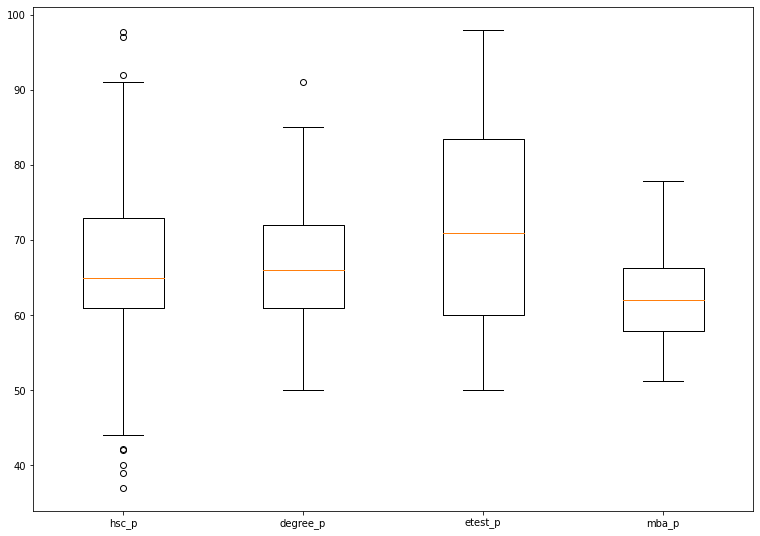

In [299]:
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(ohe_data.columns[1:5])
bp = ax.boxplot(ohe_data.iloc[:,1:5].values)
plt.show();

In [300]:
"""upper_limit = ohe_data['hsc_p'].quantile(0.75)
lower_limit = ohe_data['hsc_p'].quantile(0.25)
new_df = ohe_data[(ohe_data['hsc_p'] <= upper_limit) & (ohe_data['hsc_p'] >= lower_limit)]

upper_limit = new_df['degree_p'].quantile(0.75)
lower_limit = new_df['degree_p'].quantile(0.25)
new_df = new_df[(new_df['degree_p'] <= upper_limit) & (new_df['degree_p'] >= lower_limit)]
new_df.head()"""

"upper_limit = ohe_data['hsc_p'].quantile(0.75)\nlower_limit = ohe_data['hsc_p'].quantile(0.25)\nnew_df = ohe_data[(ohe_data['hsc_p'] <= upper_limit) & (ohe_data['hsc_p'] >= lower_limit)]\n\nupper_limit = new_df['degree_p'].quantile(0.75)\nlower_limit = new_df['degree_p'].quantile(0.25)\nnew_df = new_df[(new_df['degree_p'] <= upper_limit) & (new_df['degree_p'] >= lower_limit)]\nnew_df.head()"

In [301]:
"""fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(new_df.columns[1:5])
bp = ax.boxplot(new_df.iloc[:,1:5].values)
plt.show();"""

'fig = plt.figure(figsize =(10, 7))\n \nax = fig.add_axes([0, 0, 1, 1])\n \nax.set_xticklabels(new_df.columns[1:5])\nbp = ax.boxplot(new_df.iloc[:,1:5].values)\nplt.show();'

### Covariance Matrix

In [302]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


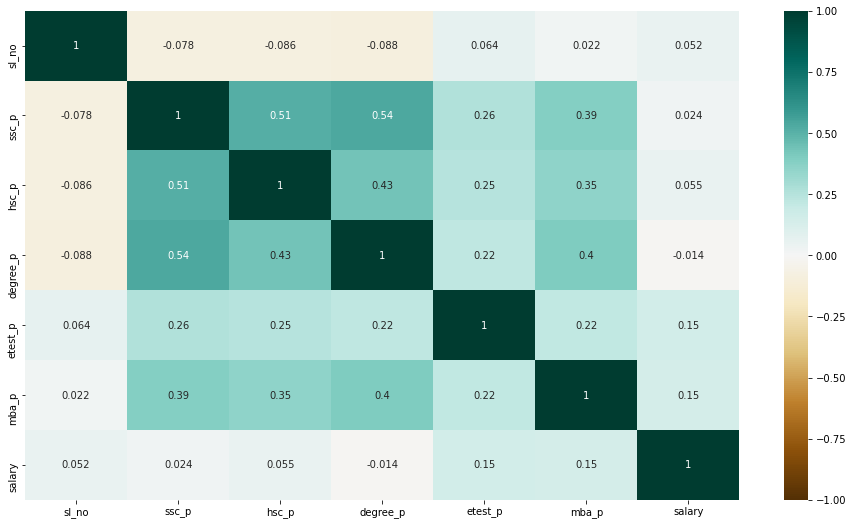

In [303]:
corr = data.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, cmap="BrBG", annot=True, vmin=-1, vmax=1);

Modeli etkileyecek herhangi bir bağımlı değişken bulunmamaktadır.

## Model Building

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix as cm
from sklearn.model_selection import GridSearchCV

SGD_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
Dtree_model = tree.DecisionTreeClassifier()
logic_model = LogisticRegression(n_jobs=-1)


In [305]:
X = ohe_data.iloc[:,:-1]
y = ohe_data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [306]:
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Central,gender_F,hsc_b_Central,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&Fin
0,67.00,91.00,58.00,55.0,58.80,270000.000000,0,0,0,1,0,0,1,0,0
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,0,0,1,0,1,1,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,1,0,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,1,0,1,0,1,0,0
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,0,0,0,1,0,1,0,0,1
211,58.00,60.00,72.00,74.0,53.62,275000.000000,0,0,0,0,1,0,1,0,1
212,67.00,67.00,73.00,59.0,69.72,295000.000000,0,0,0,1,0,1,0,1,1
213,74.00,66.00,58.00,70.0,60.23,204000.000000,0,1,0,1,0,1,0,0,0


In [307]:
param_grid_DT ={'max_depth': [1, 10, 100],
            'splitter': ['best','random'],
            'max_features': [ 'log2', 'auto', 'sqrt', 'None']}
 

In [308]:
param_grid ={'C': [1, 10, 100, 1000],
            'penalty': ['l1','l2','elasticnet'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
 

In [309]:
Gs = GridSearchCV(Dtree_model,param_grid_DT).fit(X_train, y_train)
Gs.best_params_

C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\tree\_classes.py", line 255, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.


C:\Users\balug\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_

{'max_depth': 100, 'max_features': 'log2', 'splitter': 'best'}

In [310]:
y_pred = Gs.predict(X_test)
cm(y_test, y_pred)

array([[20, 18],
       [ 5, 65]], dtype=int64)

In [311]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.53      0.63        38
           1       0.78      0.93      0.85        70

    accuracy                           0.79       108
   macro avg       0.79      0.73      0.74       108
weighted avg       0.79      0.79      0.77       108



In [312]:
ohe_data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,ssc_b_Central,gender_F,hsc_b_Central,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&Fin,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.000000,0,0,0,1,0,0,1,0,0,1
1,79.33,78.33,77.48,86.5,66.28,200000.000000,1,0,0,0,1,0,1,1,1,1
2,65.00,68.00,64.00,75.0,57.80,250000.000000,1,0,1,0,0,1,0,0,1,1
3,56.00,52.00,52.00,66.0,59.43,288655.405405,1,0,1,0,1,0,1,0,0,0
4,85.80,73.60,73.30,96.8,55.50,425000.000000,1,0,1,1,0,1,0,0,1,1


## Save Model

In [313]:
import pickle
with open('classifier.pkl', 'wb') as fid:
    pickle.dump(Gs, fid)  